In [446]:
import json
import logging
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

logger = logging.getLogger()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)

class plot_accuracy_precision_recall():
    '''...'''

    def __init__(self, path_to_data, path_to_output):
        self.path_to_data = path_to_data
        self.d = {'Dictionary - stemmed' : 'Dictionary - stemmed' ,
                    'Dictionary - not stemmed' : 'Dictionary - not stemmed',
                    'SVC count embedding' : 'SVM count embedding',
                    'SVC tfidf embedding' : 'SVM tfidf embedding',
                    'ET count' : 'ET count',
                    'ET tfidf' : 'ET tfidf',
                    'ET count embedding' : 'ET count embedding',
                    'SVC tfidf' : 'SVM tfidf',
                    'SVC count' : 'SVM count',
                    'ET tifdf embedding' : 'ET tfidf embedding',
                    'PA tfidf' : 'PA tfidf',
                    'PA count' : 'PA count',
                    'PA count embedding' : 'PA count embedding',
                    'PA tfidf embedding' : 'PA tfidf embedding',
                    'SGD count' : 'SGD count',
                    'SGD count embedding' : 'SGD count embedding',
                    'SGD tfidf' : 'SGD tfidf',
                    'SGD tfidf embedding' : 'SGD tfidf embedding' }
        
        self.emb = {'Dictionary - stemmed' : 'Dictionary - stemmed' ,
                    'Dictionary - not stemmed' : 'Dictionary - not stemmed',
                    'SVM count embedding' : 'embedding vectorizer',
                    'SVM tfidf embedding' : 'embedding vectorizer',
                    'ET count' : 'vectorizer',
                    'ET tfidf' : 'vectorizer',
                    'ET count embedding' : 'embedding vectorizer',
                    'SVM tfidf' : 'vectorizer',
                    'SVM count' : 'vectorizer',
                    'ET tifdf embedding' : 'embedding vectorizer',
                    'PA tfidf' : 'vectorizer',
                    'PA count' : 'vectorizer',
                    'PA count embedding' : 'embedding vectorizer',
                    'PA tfidf embedding' : 'embedding vectorizer',
                    'SGD count' : 'vectorizer',
                    'SGD count embedding' : 'embedding vectorizer',
                    'SGD tfidf' : 'vectorizer',
                    'SGD tfidf embedding' : 'embedding vectorizer' }
        
        
        self.path_to_output = path_to_output
        self.translator = {'hmnintrst' : 'Human interest', 'ecnmc' : 'Economic consequences', 'cnflct' : 'Conflict',
                           'attrresp' : 'Attribution of responsibility'}
  #      with open('../resources/numbers_to_topic.json') as handle:
   #            self.translator_numeric = json.loads(handle.read())
    
    def Clean_dictionary_data(self, fname):
        
        logger.info(fname)
        with open(fname) as handle:
            dictdump =  json.loads(handle.read())

        frames = []
        precision = []
        recall = []
        f1score=[]
        accuracy=[]
        trainingsize = []

        for i in dictdump:
            for k, v in i.items():
                for keys, values in v.items():
                    frames.append(keys)
                    precision.append(values[0])
                    recall.append(values[1])
                    f1score.append(values[2])
                    accuracy.append(values[3])
                    trainingsize.append(k)
                    
        df = pd.DataFrame(list(zip(frames,precision,recall,f1score,accuracy,trainingsize)))
        df.rename(columns={0 :'frame',  1 :'precision', 2 :'recall', 3 : 'f1-score', 4 : 'accuracy', 5: 'training size'}, inplace=True)
        df.set_index('frame', inplace=True)

        return df
    
    def get_data_dictionary(self):
        
        fname =  f'{self.path_to_data}precision_recall_f1score_dictionary_stemmed_FRAMES.json'
        df1 = self.Clean_dictionary_data(fname)
        df1['classifier'] = 'Dictionary - stemmed'

        fname_notstemmed = f'{self.path_to_data}precision_recall_f1score_dictionary_not_stemmed_FRAMES.json'
        df2 =  df = self.Clean_dictionary_data(fname_notstemmed)
        df2['classifier'] = 'Dictionary - not stemmed'

        df = pd.concat([df1, df2])
        #df.rename(columns={0 :'precision',  1 :'recall', 2 :'f1-score', 3 : 'accuracy'}, inplace=True)
        df.rename(index=self.translator, inplace=True)
        df['approach'] = 'Dictionary Approach'
        return df

    def get_data_sml(self):

        fname_sml = '{}learning_rate_SML.csv'.format(self.path_to_data)
        
        df = pd.read_csv(fname_sml)
        df['frame'].replace(self.translator, inplace=True)
        df.set_index('frame', inplace=True)

        df = df[['algorithm','f1_weighted', 'precision_weighted',  'recall_score_weighted', 'accuracy', 'length_training_set']]
        df.rename(columns={'algorithm': 'classifier', 'f1_weighted' : 'f1-score', 'precision_weighted' : 'precision', 'recall_score_weighted' : 'recall', 'length_training_set': 'training size'}, inplace=True)
        df['approach'] = 'SML'

        return df

    def combine_datasets(self):
        df1 = self.get_data_dictionary()
        df2 = self.get_data_sml()
        df = pd.concat([df1, df2])
     #   df.drop('total', inplace=True)
        df['Frame'] = df.index
        df.reset_index(inplace=True)
        df['classifier'] = df['classifier'].map(self.d)
        df['vectorizer'] = df['classifier'].map(self.emb)
        df["training size"] = pd.to_numeric(df["training size"])
        return df
    

In [447]:
path_to_data = '../output/frames/new/'
path_to_output ='../output/'

a = plot_accuracy_precision_recall(path_to_data, path_to_output)
df = a.combine_datasets()

INFO:root:../output/frames/new/precision_recall_f1score_dictionary_stemmed_FRAMES.json
INFO:root:../output/frames/new/precision_recall_f1score_dictionary_not_stemmed_FRAMES.json
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:124: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [351]:
df['classifier'].unique()

array(['Dictionary - stemmed', 'Dictionary - not stemmed', 'SGD tfidf',
       'SGD count', 'SGD count embedding', 'SGD tfidf embedding',
       'SVM tfidf', 'SVM count', 'SVM count embedding',
       'SVM tfidf embedding', 'PA tfidf', 'PA count',
       'PA count embedding', 'PA tfidf embedding', 'ET tfidf', 'ET count',
       'ET count embedding', 'ET tfidf embedding'], dtype=object)

In [383]:
df[df['classifier'] == 'Dictionary - stemmed' ]

,frame,accuracy,approach,classifier,f1-score,precision,recall,training size,Frame
0,Attribution of responsibility,0.502242,Dictionary Approach,Dictionary - stemmed,0.469060,0.546692,0.502242,100,Attribution of responsibility
1,Conflict,0.511211,Dictionary Approach,Dictionary - stemmed,0.498517,0.508694,0.511211,100,Conflict
2,Economic consequences,0.690583,Dictionary Approach,Dictionary - stemmed,0.693953,0.754954,0.690583,100,Economic consequences
3,Human interest,0.547085,Dictionary Approach,Dictionary - stemmed,0.583912,0.708878,0.547085,100,Human interest
4,Attribution of responsibility,0.493274,Dictionary Approach,Dictionary - stemmed,0.423755,0.570922,0.493274,200,Attribution of responsibility
5,Conflict,0.529148,Dictionary Approach,Dictionary - stemmed,0.500286,0.530797,0.529148,200,Conflict
6,Economic consequences,0.713004,Dictionary Approach,Dictionary - stemmed,0.717202,0.763109,0.713004,200,Economic consequences
7,Human interest,0.479821,Dictionary Approach,Dictionary - stemmed,0.508826,0.728489,0.479821,200,Human interest
8,Attribution of responsibility,0.452915,Dictionary Approach,Dictionary - stemmed,0.366564,0.485047,0.452915,299,Attribution of responsibility
9,Conflict,0.542601,Dictionary Approach,Dictionary - stemmed,0.511091,0.549362,0.542601,299,Conflict


In [385]:
#df[df['training size'] == 890]



df[ ( df['classifier'] == 'Dictionary - stemmed' ) & ( df['training size'] == 890 ) ]

,frame,accuracy,approach,classifier,f1-score,precision,recall,training size,Frame
32,Attribution of responsibility,0.479821,Dictionary Approach,Dictionary - stemmed,0.397717,0.553196,0.479821,890,Attribution of responsibility
33,Conflict,0.551570,Dictionary Approach,Dictionary - stemmed,0.518274,0.562551,0.551570,890,Conflict
34,Economic consequences,0.704036,Dictionary Approach,Dictionary - stemmed,0.707452,0.766876,0.704036,890,Economic consequences
35,Human interest,0.358744,Dictionary Approach,Dictionary - stemmed,0.337794,0.749874,0.358744,890,Human interest


In [409]:
df[ ( df['training size'] == 890 ) & (df['frame'] == "Attribution of responsibility") ].sort_values(['Frame', 'f1-score'], ascending=False)
    

,frame,accuracy,approach,classifier,f1-score,precision,recall,training size,Frame
590,Attribution of responsibility,0.636771,SML,SVM count embedding,0.619291,0.640014,0.636771,890,Attribution of responsibility
591,Attribution of responsibility,0.636771,SML,SVM tfidf embedding,0.617630,0.641337,0.636771,890,Attribution of responsibility
586,Attribution of responsibility,0.596413,SML,SGD count embedding,0.586832,0.591413,0.596413,890,Attribution of responsibility
592,Attribution of responsibility,0.596413,SML,PA tfidf,0.585549,0.591379,0.596413,890,Attribution of responsibility
594,Attribution of responsibility,0.582960,SML,PA count embedding,0.579749,0.579378,0.582960,890,Attribution of responsibility
585,Attribution of responsibility,0.578475,SML,SGD count,0.573960,0.574021,0.578475,890,Attribution of responsibility
584,Attribution of responsibility,0.582960,SML,SGD tfidf,0.572407,0.576829,0.582960,890,Attribution of responsibility
595,Attribution of responsibility,0.609865,SML,PA tfidf embedding,0.565976,0.625643,0.609865,890,Attribution of responsibility
597,Attribution of responsibility,0.596413,SML,ET count,0.558099,0.600160,0.596413,890,Attribution of responsibility
598,Attribution of responsibility,0.569507,SML,ET count embedding,0.557918,0.562094,0.569507,890,Attribution of responsibility


In [445]:
df[ ( df['training size'] == 890 ) & (df['frame'] == "Conflict") ].sort_values(['Frame', 'f1-score'], ascending=False)
#df[ ( df['training size'] == 890 ) & (df['frame'] == "Human interest") ].sort_values(['Frame', 'f1-score'], ascending=False)

,frame,accuracy,approach,classifier,f1-score,precision,recall,training size,Frame,vectorizer
614,Conflict,0.569507,SML,ET count embedding,0.567979,0.572365,0.569507,890,Conflict,embedding vectorizer
602,Conflict,0.569507,SML,SGD count embedding,0.565884,0.569769,0.569507,890,Conflict,embedding vectorizer
600,Conflict,0.565022,SML,SGD tfidf,0.564286,0.564664,0.565022,890,Conflict,vectorizer
607,Conflict,0.569507,SML,SVM tfidf embedding,0.556282,0.574195,0.569507,890,Conflict,NaN
603,Conflict,0.565022,SML,SGD tfidf embedding,0.555000,0.567567,0.565022,890,Conflict,embedding vectorizer
69,Conflict,0.569507,Dictionary Approach,Dictionary - not stemmed,0.549896,0.577999,0.569507,890,Conflict,Dictionary - not stemmed
613,Conflict,0.547085,SML,ET count,0.546137,0.548926,0.547085,890,Conflict,vectorizer
612,Conflict,0.547085,SML,ET tfidf,0.540672,0.553260,0.547085,890,Conflict,vectorizer
608,Conflict,0.538117,SML,PA tfidf,0.538061,0.538027,0.538117,890,Conflict,vectorizer
606,Conflict,0.556054,SML,SVM count embedding,0.536733,0.561450,0.556054,890,Conflict,NaN


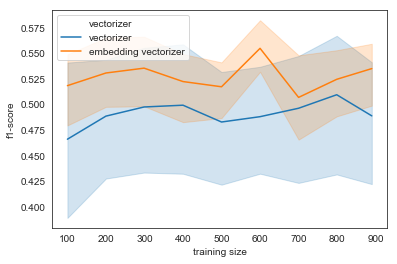

In [448]:
import seaborn as sns


conflict = df[df['frame'] == "Conflict"]
#sns.lineplot(data=conflict[conflict['classifier'].isin(['ET count embedding','ET count'])], x="training size", y="f1-score", hue="vectorizer")

sns.lineplot(data=conflict[~conflict ['vectorizer'].isin(['Dictionary - stemmed', 'Dictionary - not stemmed'])], x="training size", y="f1-score", hue="vectorizer")


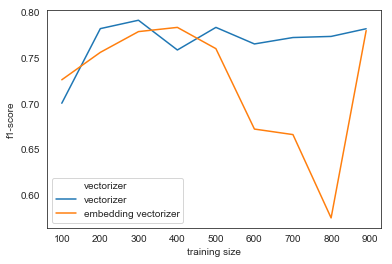

In [443]:
df[ ( df['training size'] == 890 ) & (df['frame'] == "Economic consequences") ].sort_values(['Frame', 'f1-score'], ascending=False)
economic = df[df['frame']=='Economic consequences']

sns.lineplot(data=economic [economic ['classifier'].isin(['PA tfidf embedding','PA tfidf'])], x="training size", y="f1-score", hue="vectorizer")



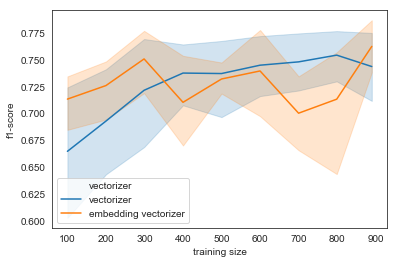

In [449]:
sns.lineplot(data=economic[~economic ['vectorizer'].isin(['Dictionary - stemmed', 'Dictionary - not stemmed'])], x="training size", y="f1-score", hue="vectorizer")

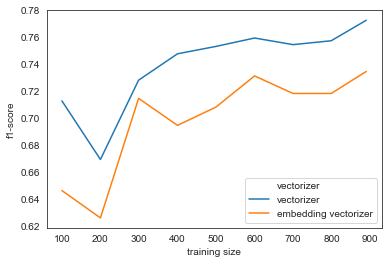

In [442]:
df[ ( df['training size'] == 890 ) & (df['frame'] == "Human interest") ].sort_values(['Frame', 'f1-score'], ascending=False)

humaninterest = df[df['frame']=="Human interest"]
sns.lineplot(data=humaninterest[humaninterest ['classifier'].isin(['SGD tfidf', 'SGD count embedding'])], x="training size", y="f1-score", hue="vectorizer")

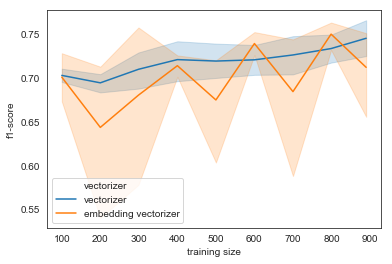

In [450]:
sns.lineplot(data=humaninterest[~humaninterest ['vectorizer'].isin(['Dictionary - stemmed', 'Dictionary - not stemmed'])], x="training size", y="f1-score", hue="vectorizer")

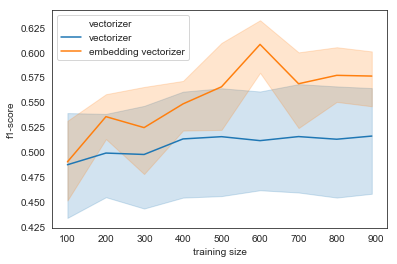

In [452]:
att = df[df['frame'] == 'Attribution of responsibility']
sns.lineplot(data=att[~att ['vectorizer'].isin(['Dictionary - stemmed', 'Dictionary - not stemmed'])], x="training size", y="f1-score", hue="vectorizer")


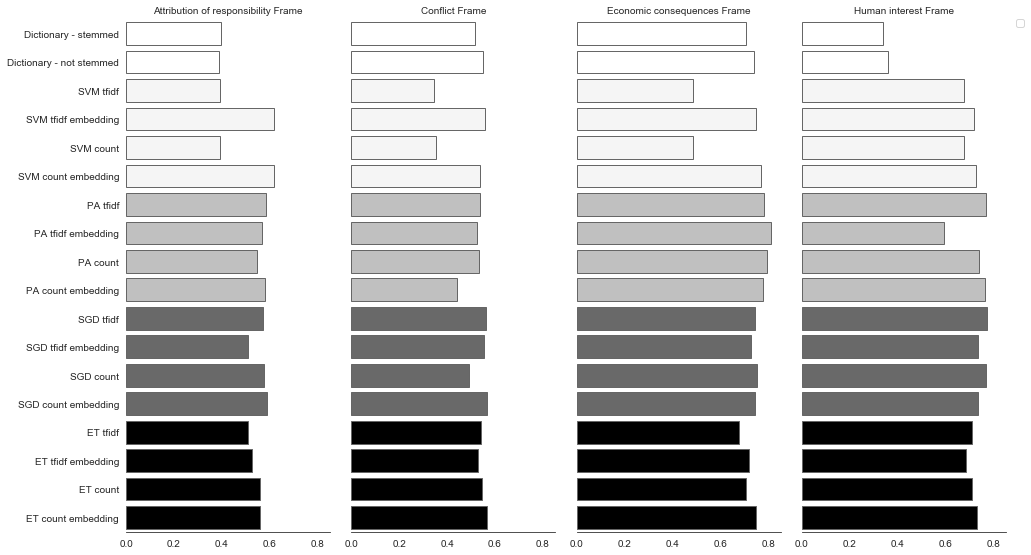

In [386]:
order = ['Dictionary - stemmed', 'Dictionary - not stemmed',  'SVM tfidf', 'SVM tfidf embedding', 'SVM count', 'SVM count embedding', 'PA tfidf', 'PA tfidf embedding', 'PA count', 'PA count embedding', 'SGD tfidf', 'SGD tfidf embedding', 'SGD count', 'SGD count embedding', 'ET tfidf', 'ET tfidf embedding', 'ET count', 'ET count embedding']
colour = ['white', 'white', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'whitesmoke', 'silver', 'silver', 'silver', 'silver', 'dimgray', 'dimgray', 'dimgray', 'dimgray', 'black', 'black', 'black', 'black']

ax = sns.catplot(y="classifier", x="f1-score", edgecolor=".4", palette=colour, col="Frame", order = order,
                data=df[df['training size']==890], kind="bar", saturation=.5,
                height=8, aspect=.45)

ax.set_titles("{col_name} {col_var}").despine(left=True)

ax.set(xlabel=None, ylabel=None)

ax = sns.set_style("white")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [340]:
d = { 'Dictionary - stemmed':'Dictionary - stemmed',
     'Dictionary - not stemmed':  'Dictionary - not stemmed',
     'SVC count embedding': 'Support Vector Machines (SVM) ~ w2v count',
      'SVC tfidf embedding':  'Support Vector Machines (SVM) ~ w2v tfidf',
     'ET count':  'ExtraTrees ~ count',
    'ET tfidf':  'ExtraTrees ~ tfidf',
    'ET count embedding' : 'ExtraTrees ~ w2v count',
    'SVC tfidf': 'Support Vector Machines (SVM) ~ tfidf',
    'SVC count': 'Support Vector Machines (SVM) ~ count',
        'ET tifdf embedding':  'ExtraTrees ~ w2v tfidf',
        'PA tfidf': 'Passive Agressive ~ tfidf',
        'PA count': 'Passive Agressive ~ count',
        'PA count embedding': 'Passive Agressive ~ w2v count',
        'PA tfidf embedding':  'Passive Agressive ~ w2v tfidf',
     'SGD count': 'Stochastic Gradient Descent (SGD) ~ count',
     'SGD count embedding' : 'Stochastic Gradient Descent (SGD) ~ w2v count',
     'SGD tfidf' : 'Stochastic Gradient Descent (SGD) ~ tfidf',
     'SGD tfidf embedding' : 'Stochastic Gradient Descent (SGD) ~ w2v tfidf' }

#df['classifier_updated'] = df['classifier'].map(d)

final_recode = {'Dictionary - stemmed' : 'Dictionary - stemmed' ,
 'Dictionary - not stemmed' : 'Dictionary - not stemmed' ,
 'Support Vector Machines (SVM) ~ w2v count': 'SVM count embedding' ,
 'Support Vector Machines (SVM) ~ w2v tfidf' : 'SVM tfidf embedding' ,
 'ExtraTrees ~ count' : 'ET count',
 'ExtraTrees ~ tfidf' : 'ET tfidf',
 'ExtraTrees ~ w2v count' : 'ET count embedding',
 'Support Vector Machines (SVM) ~ tfidf' : 'SVM tfidf',
 'Support Vector Machines (SVM) ~ count' :  'SVM count',
 'ExtraTrees ~ w2v tfidf' :  'ET tfidf embedding',
 'Passive Agressive ~ tfidf' :  'PA tfidf',
 'Passive Agressive ~ count' :  'PA count',
 'Passive Agressive ~ w2v count' :  'PA count embedding',
 'Passive Agressive ~ w2v tfidf' :  'PA tfidf embedding',
 'Stochastic Gradient Descent (SGD) ~ count' :  'SGD count',
 'Stochastic Gradient Descent (SGD) ~ w2v count' : 'SGD count embedding',
 'Stochastic Gradient Descent (SGD) ~ tfidf' : 'SGD tfidf',
 'Stochastic Gradient Descent (SGD) ~ w2v tfidf' : 'SGD tfidf embedding'}

#df['classifier_updated_final'] = df['classifier_updated'].map(final_recode)
for i, e in zip(d, final_recode.values()):
    print(i, ":", e)
    
    


SyntaxError: EOL while scanning string literal (<ipython-input-340-7bce19f666e7>, line 46)

In [ ]:
def get_data_dictionary(self):
    
    
    # getting Dictionary Approach Data
    fname = '{}recision_recall_f1score_dictionary_stemmed_FRAMES.json'.format(path_to_data)
    logger.info(fname)

    with open(fname) as handle:
        dictdump =  json.loads(handle.read())

    df = pd.DataFrame.from_dict(dictdump).transpose()
    df['classifier'] = 'Dictionary - stemmed'

    fname_notstemmed = '{}recision_recall_f1score_dictionary_not_stemmed_FRAMES.json'.format(self.path_to_data)
    logger.info(fname_notstemmed)

    with open(fname_notstemmed) as handle:
        dictdump =  json.loads(handle.read())

    df2 = pd.DataFrame.from_dict(dictdump).transpose()
    df2['classifier'] = 'Dictionary - not stemmed'

    df = pd.concat([df, df2])
    df.rename(columns={0 :'precision',  1 :'recall', 2 :'f1-score', 3 : 'accuracy'}, inplace=True)
    df.rename(index=self.translator, inplace=True)
    df['approach'] = 'Dictionary Approach'
    return df

In [290]:
fname = '{}recision_recall_f1score_dictionary_stemmed_FRAMES.json'.format(path_to_data)
logger.info(fname)

with open(fname) as handle:
    dictdump =  json.loads(handle.read())

#pd.DataFrame.from_dict([w for s in dictdump for w in s])

frames = []
precision = []
recall = []
f1score=[]
accuracy=[]
trainingsize = []

for i in dictdump:
    for k, v in i.items():
        for keys, values in v.items():
            frames.append(keys)
            precision.append(values[0])
            recall.append(values[1])
            f1score.append(values[2])
            accuracy.append(values[3])
            trainingsize.append(k)
           # recall.append(values[0])

        #if k == 'attrresp':
        #    print(v)
       # attrresp.append(v['attrresp'])
        #trainingsize.append(v['trainingsize'])

INFO:root:../output/frames/new/recision_recall_f1score_dictionary_stemmed_FRAMES.json


In [294]:
df = pd.DataFrame(list(zip(frames,precision,recall,f1score,accuracy,trainingsize)))
df['classifier'] = 'Dictionary - stemmed'
df.rename(columns={0 :'frame',  1 :'precision', 2 :'recall', 3 : 'f1-score', 4 : 'accuracy', 5: 'training size'}, inplace=True)
df.set_index('frame', inplace=True)
#df.rename(index=self.translator, inplace=True)


,precision,recall,f1score,accuracy,training size,classifier
frame,,,,,,
attrresp,0.558222,0.458045,0.377983,0.458045,100,Dictionary - stemmed
cnflct,0.554693,0.555775,0.552860,0.555775,100,Dictionary - stemmed
ecnmc,0.746335,0.639684,0.639684,0.639684,100,Dictionary - stemmed
hmnintrst,0.689287,0.486673,0.504441,0.486673,100,Dictionary - stemmed
attrresp,0.547928,0.442497,0.349759,0.442497,200,Dictionary - stemmed
cnflct,0.561483,0.553122,0.521106,0.553122,200,Dictionary - stemmed
ecnmc,0.767521,0.651698,0.652241,0.651698,200,Dictionary - stemmed
hmnintrst,0.695671,0.446878,0.454113,0.446878,200,Dictionary - stemmed
attrresp,0.569647,0.440344,0.343821,0.440344,300,Dictionary - stemmed


In [217]:
[[100] * 4 ]

[[100, 100, 100, 100]]

In [161]:
path_to_data = '../output/frames/new/'
path_to_output ='../output/'


a = plot_accuracy_precision_recall(path_to_data, path_to_output)
df = a.get_data_sml()


,classifier,f1-score,precision,recall,accuracy,training size,approach
frame,,,,,,,
Attribution of responsibility,SGD tfidf,0.552490,0.603666,0.596413,0.596413,100,SML
Attribution of responsibility,SGD count,0.593674,0.593341,0.596413,0.596413,100,SML
Attribution of responsibility,SGD count embedding,0.457096,0.610028,0.569507,0.569507,100,SML
Attribution of responsibility,SGD tfidf embedding,0.457354,0.561334,0.560538,0.560538,100,SML
Attribution of responsibility,SVC tfidf,0.392156,0.304229,0.551570,0.551570,100,SML
Attribution of responsibility,SVC count,0.392156,0.304229,0.551570,0.551570,100,SML
Attribution of responsibility,SVC count embedding,0.421708,0.756808,0.565022,0.565022,100,SML
Attribution of responsibility,SVC tfidf embedding,0.449842,0.761071,0.578475,0.578475,100,SML
Attribution of responsibility,PA tfidf,0.567919,0.613025,0.605381,0.605381,100,SML


In [162]:
df[df['training size'] == 890]

,classifier,f1-score,precision,recall,accuracy,training size,approach
frame,,,,,,,
Attribution of responsibility,SGD tfidf,0.572407,0.576829,0.582960,0.582960,890,SML
Attribution of responsibility,SGD count,0.573960,0.574021,0.578475,0.578475,890,SML
Attribution of responsibility,SGD count embedding,0.586832,0.591413,0.596413,0.596413,890,SML
Attribution of responsibility,SGD tfidf embedding,0.508163,0.583343,0.533632,0.533632,890,SML
Attribution of responsibility,SVC tfidf,0.392156,0.304229,0.551570,0.551570,890,SML
Attribution of responsibility,SVC count,0.392156,0.304229,0.551570,0.551570,890,SML
Attribution of responsibility,SVC count embedding,0.619291,0.640014,0.636771,0.636771,890,SML
Attribution of responsibility,SVC tfidf embedding,0.617630,0.641337,0.636771,0.636771,890,SML
Attribution of responsibility,PA tfidf,0.585549,0.591379,0.596413,0.596413,890,SML


In [ ]:
   def __init__(self, outputpath, datapath, path_to_embeddings, vect): 
        self.vect = vect
        self.outputpath = outputpath
        self.data_path = datapath
        self.path_to_embeddings = path_to_embeddings
        #self.model = self.Load_embedding_model()
        self.training_sizes = [100, 1000]
        self.df = self.Get_data()
        self.X_train , self.X_test, self.y_train, self.y_test = train_test_split(self.df['text_clean'], self.df['main_topic_label'], test_size = 0.2 , random_state =0)
        self.names = ["Passive Agressive", "SGDClassifier" ,"SVM", "ET"]
        self.classifiers = [PassiveAggressiveClassifier(), SGDClassifier(), SVC(), ExtraTreesClassifier() ]
        self.parameters = [ {   'clf__loss': ('hinge', 'squared_hinge'),
                                'clf__C': (0.01, 0.5, 1.0)   ,
                                'clf__fit_intercept': (True, False) ,
                                'clf__max_iter': (5 ,10 ,15)} ,

                            {   'clf__max_iter': (20, 30) ,
                                'clf__alpha': (1e-2, 1e-3, 1e-5),
                                'clf__penalty': ('l2', 'elasticnet')} ,

                            {   'clf__C': [1, 10, 100, 1000],
                                'clf__gamma': [0.001, 0.0001],
                                'clf__kernel': ['rbf', 'linear']},
                           
                            {  "clf__max_features": ['auto', 'sqrt', 'log2'] } ]


In [132]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,  TfidfTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import logging
import json
from sklearn.svm import SVC
import embeddingvectorizer
from sklearn.ensemble import ExtraTreesClassifier
import gensim


logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class Learning_rate_SML_topics():
    
    def __init__(self, outputpath, datapath, path_to_embeddings, vect): 
        self.vect = vect
        self.outputpath = outputpath
        self.data_path = datapath
        self.model = self.Load_embedding_model()
        self.path_to_embeddings = path_to_embeddings
        self.training_sizes = [i for i in range(100, len(train), 200) ]
        self.df = self.Get_data()
        self.X_train , self.X_test, self.y_train, self.y_test = train_test_split(self.df['text_clean'], self.df['main_topic_label'], test_size = 0.2 , random_state =0)
        self.names = ["Passive Agressive", "SGDClassifier" ,"SVM", "ET"]
        self.classifiers = [PassiveAggressiveClassifier(), SGDClassifier(), SVC(), ExtraTreesClassifier() ]
        self.parameters = [ {   'clf__loss': ('hinge', 'squared_hinge'),
                                'clf__C': (0.01, 0.5, 1.0)   ,
                                'clf__fit_intercept': (True, False) ,
                                'clf__max_iter': (5 ,10 ,15)} ,

                            {   'clf__max_iter': (20, 30) ,
                                'clf__alpha': (1e-2, 1e-3, 1e-5),
                                'clf__penalty': ('l2', 'elasticnet')} ,

                            {   'clf__C': [1, 10, 100, 1000],
                                'clf__gamma': [0.001, 0.0001],
                                'clf__kernel': ['rbf', 'linear']},
                           
                            {  "clf__max_features": ['auto', 'sqrt', 'log2'] } ]

    def Get_data(self):
        df = pd.read_pickle(self.data_path)
        return df
    
    def Load_embedding_model(self):
        logging.info("\nLoading model...")

        mod = gensim.models.Word2Vec.load(self.path_to_embeddings)
        MDL = dict(zip(mod.wv.index2word, mod.wv.syn0))
        return MDL

    def Define_vectorizer(self):
    
        logging.info("this is length of the dataframe: {}".format(len(self.df)))

        if self.vect == 'tfidf':
            logging.info("the vectorizers is: {}".format(self.vect))
            VECT = TfidfVectorizer()

        elif self.vect == 'count':
            logging.info("the vectorizers is: {}".format(self.vect))
            VECT = CountVectorizer()

        elif self.vect == 'w2v_count':
            logging.info("the vectorizers is: {}".format(self.vect))

            VECT = embeddingvectorizer.EmbeddingCountVectorizer(self.model, 'mean')

        elif self.vect == 'w2v_tfidf':
            logging.info("the vectorizers is: {}".format(vect))
            VECT = embeddingvectorizer.EmbeddingTfidfVectorizer(self.model, 'mean')

        return VECT

    def Benchmark(self, n):
        test_size = 1 - (n / float(len(self.X_train)))
        
        X_train , X_test, y_train, y_test = train_test_split(self.X_train, self.y_train, test_size = test_size , random_state =0)
        logging.info(f"new length of the training TEXT: {len(X_train)} and LABELS {len(y_train)} ")
        assert len(X_train) == len(y_train)
        return X_train, y_train


    def Run_models(self):

        f_results_class = []
        f_true_predicted = []
        class_report = []
        results = []
        
        
        for trainingsize in self.training_sizes:
            logging.info(f"TRAINING SIZE{trainingsize}\n\n\n\n")

            X_train, y_train = self.Benchmark(trainingsize)
            logging.info(f"Starting analyses with the a training set of the following size: TEXT: {len(X_train)} LABELS: {len(y_train)}")


            for name, classifier, params in zip(self.names, self.classifiers, self.parameters):
                my_dict = {}
                logging.info(name)
                logging.info(classifier)
                logging.info(params)
                clf_pipe = Pipeline([
                    ('vect', self.Define_vectorizer()),
                    ('clf', classifier),
                ])


                gs_clf = GridSearchCV(clf_pipe, param_grid=params, cv=5)
                logger.info("Starting gridsearch....")
                clf = gs_clf.fit(X_train, y_train)
                score = clf.score(self.X_test, self.y_test)

                logging.info("{} score: {}".format(name, score))
                logging.info("{} are the best estimators".format(clf.best_estimator_))

                results_to_dict = classification_report((clf.best_estimator_.predict(self.X_test)), self.y_test, output_dict= True)

                results_to_dict['classifier:'] = name
                results_to_dict['training_size'] = trainingsize
                results_to_dict['best estimators:'] = clf.best_params_

                logging.info("Created dictionary with classification report: \n\n{}".format(results_to_dict))

                y_hats = clf.predict(self.X_test)

                my_dict = {"predicted": y_hats,
                           "actual" : self.y_test.values  ,
                           "classifier" : name,
                           "training_size": trainingsize}

                results.append(my_dict)
                class_report.append(results_to_dict)
        
        f_true_predicted.append(results)
        f_results_class.append(class_report)
        return f_results_class, f_true_predicted
    
    def Get_scores(self):
    
        class_report, results = self.Run_models()
        
        fname_accuracy = '{}SML_precision_recall_f1score_text_cleaned_{}.json'.format(self.outputpath, self.vect)
        fname_predictions = '{}SML_predicted_actual_text_cleaned_{}.json'.format(self.outputpath, self.vect)

        with open(fname_accuracy, mode = 'w') as fo:
            json.dump(class_report, fo)
            
        return class_report, results
    
        data = pd.DataFrame.from_dict([l for item in results for l in item ] )

        predicted = data.predicted.apply(pd.Series) \
                .merge(data, right_index = True, left_index = True) \
                .drop(["predicted"], axis = 1) \
                .melt(id_vars = ['classifier', 'training_size'], value_name = "Predicted label")
        actual = data.actual.apply(pd.Series) \
                .merge(data, right_index = True, left_index = True) \
                .drop(["predicted"], axis = 1) \
                .melt(id_vars = ['classifier', 'training_size'], value_name = "Actual label")

        df = pd.merge(predicted, actual, how = 'inner', left_index = True, right_index = True)

        df['Classifier'] = df['classifier_x']
        df['training_size'] = df['training_size_x']
        df = df[df.variable_x != 'actual']
        df = df[['Predicted label', 'Actual label', 'Classifier', 'training_size']]
        df.to_json(fname_predictions)


if __name__ == "__main__":

    logger = logging.getLogger()
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
    logging.root.setLevel(level=logging.INFO)

    for vectorizer in ["w2v_count", "w2v_tfidf", "count", "tfidf"]:
        
        a = Learning_rate_SML_topics(outputpath='../output/topics/', 
                                     datapath = '/Users/anne/repos/RPA/data/intermediate/RPA_data_with_dictionaryscores.pkl', 
                                     vect = vectorizer,
                                     path_to_embeddings = '/Users/anne/repos/embedding_models/RPA/w2v_300d2000-01-01_2018-12-31')

        class_report, results = a.Get_scores()


INFO:root:TRAINING SIZE100




INFO:root:new length of the training TEXT: 100 and LABELS 100 
INFO:root:Starting analyses with the a training set of the following size: TEXT: 100 LABELS: 100
INFO:root:Passive Agressive
INFO:root:PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)
INFO:root:{'clf__loss': ('hinge', 'squared_hinge'), 'clf__C': (0.01, 0.5, 1.0), 'clf__fit_intercept': (True, False), 'clf__max_iter': (5, 10, 15)}
INFO:root:this is length of the dataframe: 2807
INFO:root:the vectorizers is: count
INFO:root:Starting gridsearch....
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

INFO:root:TRAINING SIZE1000




INFO:root:new length of the training TEXT: 1000 and LABELS 1000 
INFO:root:Starting analyses with the a training set of the following size: TEXT: 1000 LABELS: 1000
INFO:root:Passive Agressive
INFO:root:PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)
INFO:root:{'clf__loss': ('hinge', 'squared_hinge'), 'clf__C': (0.01, 0.5, 1.0), 'clf__fit_intercept': (True, False), 'clf__max_iter': (5, 10, 15)}
INFO:root:this is length of the dataframe: 2807
INFO:root:the vectorizers is: count
INFO:root:Starting gridsearch....
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol par

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

In [133]:
import pandas as pd
results = pd.read_csv('../output/frames/new/learning_rate_SML.csv')

In [134]:
len(results)

576

In [17]:
results['length_training_set'].unique()

array([100, 200, 299, 400, 500, 600, 700, 799, 890])

In [30]:

results[(results.frame == 'attrresp') & (results.algorithm == 'SVC tfidf embedding')]

,Unnamed: 0,length_training_set,frame,algorithm,accuracy,f1_weighted,f1_macro,f1_micro,recall_score_weighted,precision_weighted,recall_score_macro,precision_macro,recall_score_micro,precision_micro
7,7,100,attrresp,SVC tfidf embedding,0.578475,0.449842,0.418368,0.578475,0.578475,0.761071,0.530000,0.783410,0.578475,0.578475
71,71,200,attrresp,SVC tfidf embedding,0.591928,0.503588,0.478503,0.591928,0.591928,0.649468,0.549675,0.657637,0.591928,0.591928
135,135,299,attrresp,SVC tfidf embedding,0.587444,0.495668,0.469926,0.587444,0.587444,0.641355,0.544675,0.648916,0.587444,0.587444
199,199,400,attrresp,SVC tfidf embedding,0.600897,0.571607,0.557273,0.600897,0.600897,0.601692,0.574634,0.601887,0.600897,0.600897
263,263,500,attrresp,SVC tfidf embedding,0.641256,0.634812,0.627402,0.641256,0.641256,0.638982,0.628049,0.637675,0.641256,0.641256
327,327,600,attrresp,SVC tfidf embedding,0.654709,0.652050,0.646491,0.654709,0.654709,0.652616,0.645854,0.650428,0.654709,0.654709
391,391,700,attrresp,SVC tfidf embedding,0.623318,0.609123,0.598921,0.623318,0.623318,0.622148,0.604309,0.621727,0.623318,0.623318
455,455,799,attrresp,SVC tfidf embedding,0.614350,0.593112,0.580900,0.614350,0.614350,0.614918,0.591504,0.615082,0.614350,0.614350
519,519,890,attrresp,SVC tfidf embedding,0.636771,0.617630,0.606342,0.636771,0.636771,0.641337,0.614634,0.642684,0.636771,0.636771


In [32]:
results[(results.frame == 'attrresp') & (results.algorithm == 'SVC tfidf embedding')].sort_values(['frame', 'f1_weighted'], ascending=False)

,Unnamed: 0,length_training_set,frame,algorithm,accuracy,f1_weighted,f1_macro,f1_micro,recall_score_weighted,precision_weighted,recall_score_macro,precision_macro,recall_score_micro,precision_micro
327,327,600,attrresp,SVC tfidf embedding,0.654709,0.652050,0.646491,0.654709,0.654709,0.652616,0.645854,0.650428,0.654709,0.654709
263,263,500,attrresp,SVC tfidf embedding,0.641256,0.634812,0.627402,0.641256,0.641256,0.638982,0.628049,0.637675,0.641256,0.641256
519,519,890,attrresp,SVC tfidf embedding,0.636771,0.617630,0.606342,0.636771,0.636771,0.641337,0.614634,0.642684,0.636771,0.636771
391,391,700,attrresp,SVC tfidf embedding,0.623318,0.609123,0.598921,0.623318,0.623318,0.622148,0.604309,0.621727,0.623318,0.623318
455,455,799,attrresp,SVC tfidf embedding,0.614350,0.593112,0.580900,0.614350,0.614350,0.614918,0.591504,0.615082,0.614350,0.614350
199,199,400,attrresp,SVC tfidf embedding,0.600897,0.571607,0.557273,0.600897,0.600897,0.601692,0.574634,0.601887,0.600897,0.600897
71,71,200,attrresp,SVC tfidf embedding,0.591928,0.503588,0.478503,0.591928,0.591928,0.649468,0.549675,0.657637,0.591928,0.591928
135,135,299,attrresp,SVC tfidf embedding,0.587444,0.495668,0.469926,0.587444,0.587444,0.641355,0.544675,0.648916,0.587444,0.587444
7,7,100,attrresp,SVC tfidf embedding,0.578475,0.449842,0.418368,0.578475,0.578475,0.761071,0.530000,0.783410,0.578475,0.578475


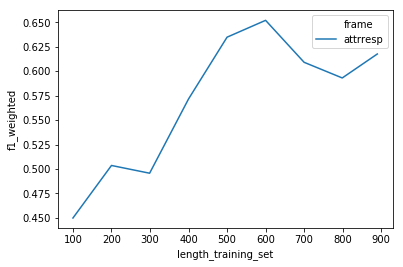

In [33]:
import seaborn as sns
sns.lineplot(data=results[(results.frame == 'attrresp') & (results.algorithm == 'SVC tfidf embedding')], x="length_training_set", y="f1_weighted", hue="frame")

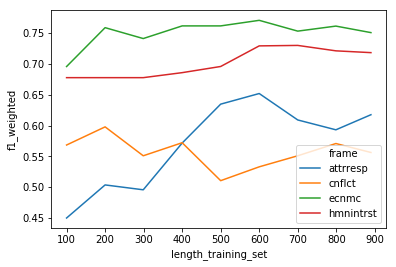

In [35]:
import seaborn as sns
sns.lineplot(data=results[results.algorithm == 'SVC tfidf embedding'], x="length_training_set", y="f1_weighted", hue="frame")

In [ ]:
#pd.DataFrame.from_dict([mydict for item in results for mydict in item])
#df.sort_values(['algorithm', 'frame', 'length_training_set'])

df = pd.DataFrame.from_dict([i for i in results])
df.sort_values(['algorithm', 'frame', 'length_training_set'])

In [ ]:
f_results = []
for i in results:
    for x in i: 
        f_results.append(x)
   # print(i)
    #f_results.append(i)
   # for k, v in i.items():
   #     print(v)
    
#f_results = [mydict for item in results for mydict in item]


In [ ]:
df = pd.DataFrame.from_dict(f_results)
df.sort_values(['frame','length_training_set'])


In [ ]:
logging.info('Saving file....')
fname = '{}SML_results_text_cleaned'.format(OUTPUTPATH)
df.to_json(fname)


# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(order,range(len(order))))
# Generate a rank column that will be used to sort
# the dataframe numerically
df['Tm_Rank'] = df['classifier_updated'].map(sorterIndex)
df.sort_values(['Frame','Tm_Rank']).to_csv('../output/results_frames.csv')


In [ ]:
df=pd.read_pickle('../data/intermediate/RPA_data_with_dictionaryscores.pkl')
train, test = train_test_split(df, random_state=42, test_size=0.3, shuffle=True)

print(f"lenght of the training data: {len(train)}")
print(f"lenght of the testing data: {len(test)}")

for n in [100, 200, 300, 400]:
    print(f"training size: {n}")
    test_size = 1 - (n / float(len(train)))
    train_set, test_set = train_test_split(train, random_state=42, test_size=test_size)
    print(f"lenght of the training data: {len(train_set)}")
    print(f"lenght of the test data: {len(test)}")

In [ ]:
PATH = '../data/intermediate/RPA_data_with_dictionaryscores.pkl'



df = pd.read_pickle(PATH)
# only keep newspaper data
df = df[df['type'] == 'newspaper']
# define frames
frames = ['attrresp', 'cnflct','ecnmc', 'hmnintrst']

# 2 = not present, set to zero (0 = not present, 1 = present)
df[frames] = df[frames].replace({2:0})
df['attrresp'].fillna(0, inplace=True)
#df.rename(columns= {'text_x': 'text'}, inplace=True)

df.rename(columns= {'text_clean': 'text'}, inplace=True)

train, test = train_test_split(df, random_state=42, test_size=0.3, shuffle=True)


In [142]:

from sklearn.model_selection import train_test_split
df=pd.read_pickle('../data/intermediate/RPA_data_with_dictionaryscores.pkl')
len(df)

train, test = train_test_split(df, random_state=42, test_size=0.2, shuffle=True)
len(train)
#len(test)



2245

In [ ]:
df=pd.read_pickle('../data/intermediate/RPA_data_with_dictionaryscores.pkl')
df = df[df['type'] == 'newspaper']

frames = ['attrresp', 'cnflct','ecnmc', 'hmnintrst']
df[frames] = df[frames].replace({2:0})
df['attrresp'].fillna(0, inplace=True)
df.rename(columns= {'text_clean': 'text'}, inplace=True)

train, test = train_test_split(df, random_state=42, test_size=0.3, shuffle=True)

print(f"lenght of the training data: {len(train)}")
print(f"lenght of the testing data: {len(test)}")

for n in [100, 200, 300, 400]:
    print(f"training size: {n}")
    test_size = 1 - (n / float(len(train)))
    train_set, test_set = train_test_split(train, random_state=42, test_size=test_size)
    print(f"lenght of the training data: {len(train_set)}")
    print(f"lenght of the test data: {len(test)}")
    
    ET_tfidf_pipeline = Pipeline([
                         ('tfidf', TfidfVectorizer()),
                         ('clf', OneVsRestClassifier(ExtraTreesClassifier()))
                        ]) 


    all_models = [("ET_tfidf_pipeline", ET_tfidf_pipeline ) ,]

    for f in ["attrresp"]:
        for name, model in all_models:
            clf = model.fit(train_set.text, train_set[f])
            y_pred  = clf.predict(test.text)
            print(accuracy_score(test[f], y_pred))
            print(f1_score(test[f], y_pred, average='weighted') )


In [ ]:
ET_tfidf_pipeline = Pipeline([
                         ('tfidf', TfidfVectorizer()),
                         ('clf', OneVsRestClassifier(ExtraTreesClassifier()))
                        ]) 


all_models = [("ET_tfidf_pipeline", ET_tfidf_pipeline ) ,]


for f in ["attresp"]:
    for name, model in all_models:
        clf = model.fit(train.text, train[f])
        y_pred  = clf.predict(test.text)
        print(accuracy_score(test["attrresp"], y_pred))
        print(f1_score(test["attrresp"], y_pred, average='macro') )



In [ ]:
unsorted_scores

In [ ]:
len(train)

len(train_set)

len(df)

In [ ]:
test_size = 1 - (1200 / float(len(df)))
train_set, test_set = train_test_split(df, random_state=42, test_size=test_size)
train_set, test_set
len(test_set)

In [ ]:
len(train_set)

In [ ]:
df = pd.read_pickle(PATH)
df = df[df['type'] == 'newspaper']
frames = ['attrresp', 'cnflct','ecnmc', 'hmnintrst']

df[frames] = df[frames].replace({2:0})
df['attrresp'].fillna(0, inplace=True)

df.rename(columns= {'text_clean': 'text'}, inplace=True)

train, test = train_test_split(df, random_state=42, test_size=0.2)
print(len(test))

clf = ET_tfidf_pipeline.fit(train.text, train["attrresp"])
y_pred  = clf.predict(test.text)
#y_pred = cross_val_predict(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2) 

#pr = clf.predict(test.text)
accuracy_score(test["attrresp"], y_pred)
f1_score(test["attrresp"], y_pred, average='macro')

In [ ]:
train, test_nb = train_test_split(train, random_state=42, test_size=0.8)
print(len(train))
print(len(test))

clf = ET_tfidf_pipeline.fit(train.text, train["attrresp"])
y_pred  = clf.predict(test.text)
#y_pred = cross_val_predict(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2) 

#pr = clf.predict(test.text)
accuracy_score(test["attrresp"], y_pred)
f1_score(test["attrresp"], y_pred, average='macro')

In [ ]:
train, test = train_test_split(df, random_state=42, test_size=0.9, shuffle=True)

clf = ET_tfidf_pipeline.fit(train.text, train["attrresp"])
y_pred  = clf.predict(test.text)
#y_pred = cross_val_predict(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2) 

#pr = clf.predict(test.text)
accuracy_score(test["attrresp"], y_pred)
f1_score(test["attrresp"], y_pred, average='macro')

In [ ]:
clf = ET_tfidf_pipeline.fit(train_set.text, train_set["attrresp"])
y_pred  = clf.predict(test_set.text)
#y_pred = cross_val_predict(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2) 

#pr = clf.predict(test.text)
accuracy_score(test_set["attrresp"], y_pred)
f1_score(test_set["attrresp"], y_pred, average='weighted')

In [ ]:
#from sklearn.model_selection import cross_val_predict
#clf = cross_validate(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2)

clf = ET_tfidf_pipeline.fit(train_set.text, train_set["attrresp"])
y_pred  = clf.predict(test_set.text)
#y_pred = cross_val_predict(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2) 

#pr = clf.predict(test.text)
accuracy_score(test["attrresp"], y_pred)
f1_score(test["attrresp"], y_pred, average='macro')
           


In [ ]:
#from sklearn.model_selection import cross_val_predict
#clf = cross_validate(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2)

clf = ET_tfidf_pipeline.fit(train_set.text, train_set["attrresp"])
y_pred  = clf.predict(test_set.text)
#y_pred = cross_val_predict(ET_tfidf_pipeline, train.text, train["attrresp"], cv=2) 

#pr = clf.predict(test.text)
accuracy_score(test_set["attrresp"], y_pred)
f1_score(test_set["attrresp"], y_pred, average='macro')

In [ ]:
import json

path_to_data = '../output/frames/new/recision_recall_f1score_dictionary_stemmed_FRAMES.json'

with open(path_to_data) as h:
    data = json.loads(h.read())

In [ ]:
training_sizes = []
attrresp = []
cnflct = []
ecnmc = []
hmnintrst = []

for i in data:
    for k, v in i.items():
        training_sizes.append(k)
        for x in v.items():
            if x[0] == 'attrresp':
                #print(f"Macro f1 score: {x[1][3]}")
                attrresp.append(x[1][3])
            elif x[0] == 'cnflct':
                cnflct.append(x[1][3])
            elif x[0] == 'ecnmc':
                ecnmc.append(x[1][3])
            elif x[0] == 'hmnintrst':
                hmnintrst.append(x[1][3])

len(training_sizes) == len(attrresp) == len(cnflct) == len(hmnintrst) == len(ecnmc)

df = pd.DataFrame(list(zip(training_sizes, attrresp, cnflct, hmnintrst, ecnmc)), 
             columns=["training_sizes", "F1", "F2", "F3", "F4"])

In [ ]:
df['id'] = df.index

In [ ]:
df = pd.wide_to_long(df, stubnames="F", i="training_sizes", j='frame')

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df['frame'] = df['frame'].map({1: 'attresp', 2:'conflct', 3: 'hmnintrst', 4: 'ecnmc'}) 

In [ ]:
import seaborn as sns
sns.lineplot(data=df, x="training_sizes", y="F", hue="frame")

In [ ]:
       

def Map_dict_to_text(self, stemmed, test_set):
    
    result = []
    if stemmed == True: type_of_text = 'stemmed_text'
    else: type_of_text = 'text'
        
    for document, documentnr in zip(test_set[type_of_text], test_set['documentnr']):
        topics_per_document = {}
        document = str(document)
        if stemmed == False:
            d = get_final_dicts()
        elif stemmed == True:
            d = get_stemmed_dict()
        for topic, words in d.items():
            try:
                match = [x for x in words if x in document.lower().split(' ')]
            except:
                print("HU", document)
                match = []

            topics_per_document = {'documentnr' : documentnr,
                                    'frame': topic,
                                    'len matches' : len(match),
                                    'words matches' : match }
            
            result.append(topics_per_document)
            
    df = pd.DataFrame.from_dict(result)
    df = df.pivot(index='documentnr', columns='frame', values='len matches')
    df[df>1] = 1
    
    return df

def Get_tp_fp_fn(self, stemmed):

    '''create columns with true postives, false positives, and false negatives'''
    
    df = self.Map_dict_to_text(stemmed = stemmed)
    df = pd.merge(test, df, how= 'left', on = 'documentnr')

    for frame, frame_d in zip(self.frames, self.frames_d):
        columnname_tp = "_tp " + str(frame)
        columnname_fp = "_fp " + str(frame)
        columnname_fn = "_fn " + str(frame)
        columnname_tn = "_tn " + str(frame)

        df[columnname_tp] = np.where( (df[frame] == 1) & (df[frame_d] == 1) , 1, 0 ) # false positive = dictionary identified, but golden standard not.
        df[columnname_fp] = np.where( (df[frame] != 1) & (df[frame_d] == 1) , 1, 0 ) # false negative = dictionary NOT identified, but golden standard DID identify
        df[columnname_fn] = np.where( (df[frame] == 1) & (df[frame_d] != 1) , 1, 0 )
        df[columnname_tn] = np.where( (df[frame] == 0) & (df[frame_d] == 0) , 1, 0 )

    return df

def Get_recall_precision(self, stemmed):

    true_positives = ["_tp " + str(i) for i in frames]
    true_negatives = ["_tn " + str(i) for i in frames]
    false_positives = ["_fp " + str(i) for i in frames]
    false_negatives = ["_fn " + str(i) for i in frames]

    recall = {}
    precision = {}
    f1score = {}
    accuracy = {}

    df = self.Get_tp_fp_fn(stemmed=stemmed)
  
    for tp, tn, fp, fn, frame, frame_d in zip(true_positives, true_negatives, false_positives, false_negatives, self.frames, self.frames_d) :
        recall[str(frame)] = recall_score(df[frame], df[frame_d], average='macro', sample_weight=None)
        precision[str(frame)] = precision_score(df[frame], df[frame_d], average='macro', sample_weight=None)
        f1score[str(frame)] = f1_score(df[frame], df[frame_d], average='macro', sample_weight=None)
        accuracy[str(frame)] = (df[tp].sum(axis=0) + df[tn].sum(axis=0)) / (df[tp].sum(axis=0) + df[tn].sum(axis=0) + df[fp].sum(axis=0) + df[fn].sum(axis=0) )

    return recall, precision, f1score, accuracy

#train, test = train_test_split(df, random_state=42, test_size=0.3, shuffle=True)
    
    def benchmark(self, n):
        test_size = 1 - (n / float(len(self.df)))
        train, test = train_test_split(data, random_state=42, test_size=n)
        return train, test

    def get_results():
        final_results = []
        
        for i in self.training_sizes:
            recall, precision, f1score, accuracy = self.Get_recall_precision(stemmed=True)
            total = { k: [ precision[k] , recall[k], f1score[k], accuracy[k]] for k in recall }

            final_results.append({i: total})

        fname = '{}recision_recall_f1score_dictionary_stemmed_FRAMES.json'.format(OUTPUT_PATH)
        logging.info("STEMMED: Recall: {}, precision: {}, f1_score: {}".format(recall, precision, f1score))

        with open(fname, mode='w') as fo:
            json.dump(final_results, fo)

        logging.info("Created file {}".format(fname))

get_results()
        

In [ ]:
OUTPUT_PATH ='../output/frames/new/'
PATH = '../data/intermediate/RPA_data_with_dictionaryscores.pkl'

DICT_LENGTH = 30

df = pd.read_pickle(PATH)
# only keep newspaper data
df = df[df['type'] == 'newspaper']
frames = ['attrresp', 'cnflct','ecnmc', 'hmnintrst']

# 2 = not present, set to zero (0 = not present, 1 = present)

df[frames] = df[frames].replace({2:0})
df['attrresp'].fillna(0, inplace=True)
df.rename(columns= {'text_x': 'text'}, inplace=True)
training_sizes = [i for i in range(1, len(df), 500)]


In [ ]:


    recall, precision, f1score, accuracy = get_recall_precision(frames = frames, type_of_text = 'text', stemmed=False)
    total = { k: [ precision[k] , recall[k], f1score[k], accuracy[k]] for k in recall }
    

fname = '{}recision_recall_f1score_dictionary_not_stemmed_FRAMES.json'.format(OUTPUT_PATH)
logging.info("NOT STEMMED: Recall: {}, precision: {}, f1_score: {}".format(recall, precision, f1score))

with open(fname, mode='w') as fo:
    json.dump(results_different_n, fo)

logging.info("Created file {}".format(fname))

In [ ]:

    
    #scores.append(accuracy_score(model.fit(X_train, y_train).predict(X_test), y_test))
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    scores.append(accuracy_score(y_test, preds))
    precision,recall,fscore,support=score(y_test, preds, average='weighted')
    #recall_.append(recall)
    #precision_.append(precision)
    #f1score_.append(fscore)
    print("precision: {}, recall: {};, f1socre: {}, mean (accuracy) scores: {}".format(precision, recall, fscore, np.mean(scores)))
    return np.mean(scores), recall, precision, fscore


In [ ]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

OUTPUT_PATH ='../output/frames/new'
PATH = '../data/intermediate/RPA_data_with_dictionaryscores.pkl'

DICT_LENGTH = 30



